In [12]:
import pandas as pd
import seaborn as sns
from scripts.data_processing import process_data
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [13]:
df_met = process_data()

In [4]:
df_met['time'] = df_met['time'].apply(lambda x: int(x/100))

In [5]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
path = os.path.join(base_dir, 'data/clean/demand_curve.csv')
df_demand = pd.read_csv(path)

In [6]:
df_met_grouped = df_met.copy().groupby(by = ['date', 'time']).mean().reset_index()

In [7]:
df_demand['date'] = pd.to_datetime(df_demand['date'])
df_demand['time'] = pd.to_datetime(df_demand['time'], format = 'mixed')
df_demand['time'] = df_demand['time'].apply(lambda x: x.time())

In [8]:
df_met_grouped['date'] = pd.to_datetime(df_met_grouped['date'])
df_met_grouped['time'] = pd.to_datetime(df_met_grouped['time'], unit = 'h')
df_met_grouped['time'] = df_met_grouped['time'].apply(lambda x: x.time())

In [9]:
df = df_met_grouped.merge(df_demand, on=['date', 'time'])

In [10]:
df['date'] = df.apply(lambda x: x['date'].replace(hour=x['time'].hour, minute = x['time'].minute, second = x['time'].second), axis=1)
df = df.drop(columns = 'time')

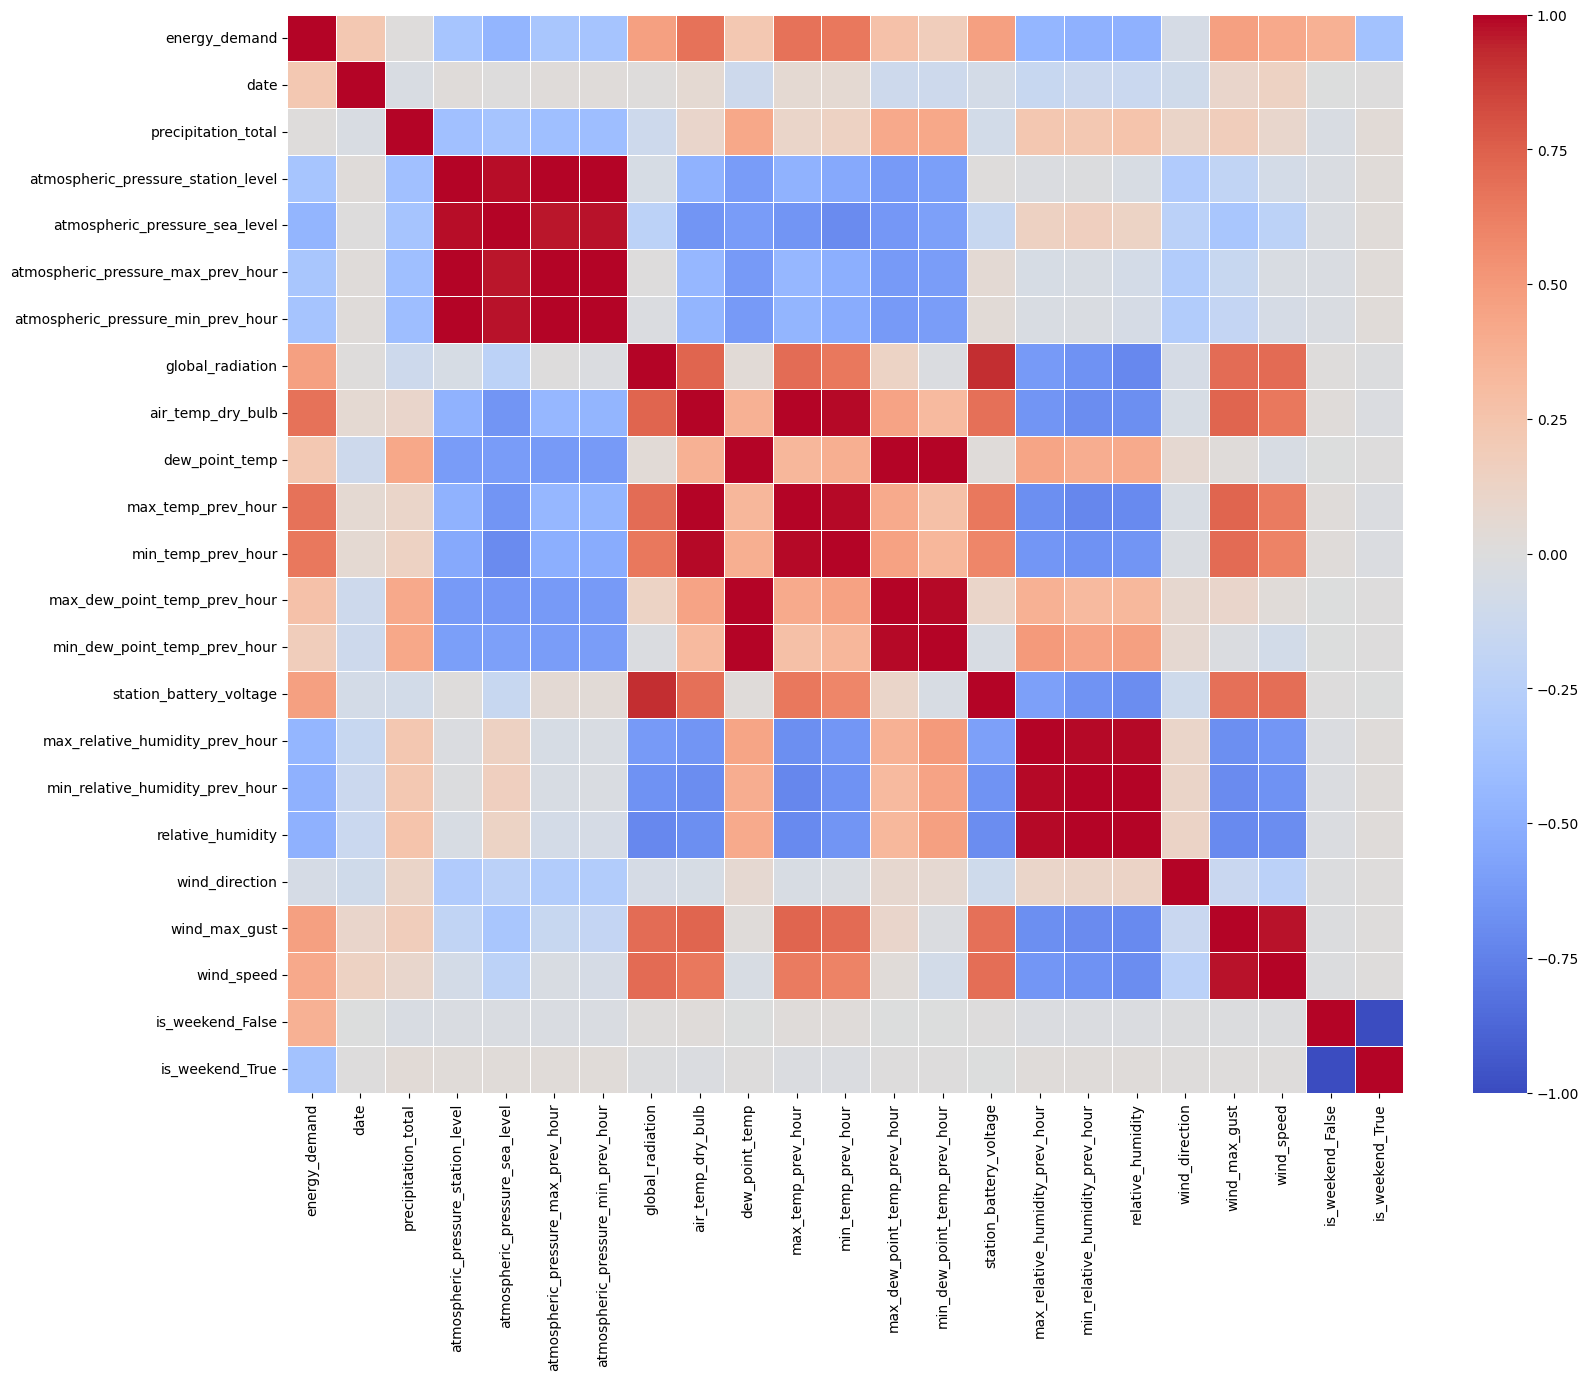

In [16]:
cols = df.columns.tolist()

cols.insert(0, cols.pop(cols.index('energy_demand')))
df = df[cols]

dummied = pd.get_dummies(df.copy().drop(['station_CPU_temp', 'month', 'year'], axis = 1), columns = ['is_weekend'])
correlation = dummied.corr()
plt.figure(figsize=(18, 14))
matrix = sns.heatmap(correlation, cmap='coolwarm', annot=False, linewidths = 0.5)
plt.show()

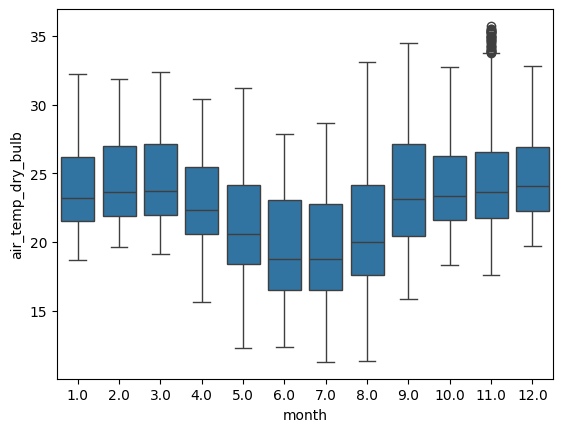

In [11]:
temp_boxplot = sns.boxplot(df, x = 'month', y = 'air_temp_dry_bulb')

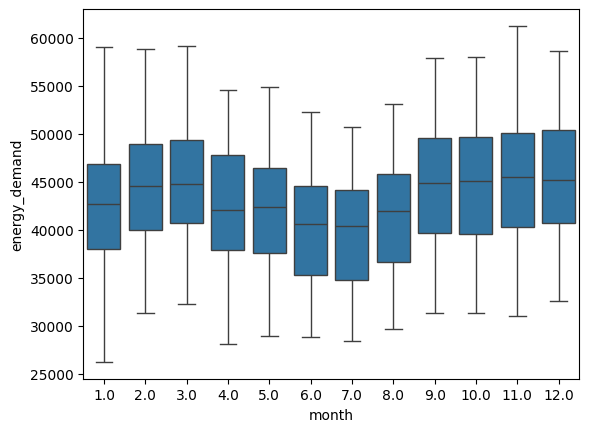

In [12]:
demand_boxplot = sns.boxplot(df, x = 'month', y = 'energy_demand')
plt.show()

df.to_csv('../data/clean/processed_met_data.csv', index = False)